We focused on understanding the Naive Bayes algorithm from a theoretical standpoint. We learned about how the algorithm classifies messages, assumptions that the algorithm makes and particular edge cases we need to account for to ensure it works. In this project, we're going to apply what we've learned about the algorithm by actually building a spam filter for SMS messages.

To classify messages as spam or non-spam, we saw that the computer:

1. Humans provide a computer with information on what spam looks like and what non-spam looks like
2. The computer uses that human knowledge to estimate probabilities for new messages — probabilities for spam and non-spam.
3. Finally, the computer classifies a new message based on the probability values it calculated in step 2 — if the probability for spam is greater, then it classifies the message as spam. Otherwise, it classifies it as non-spam. In cases where these two probabilities are near-equal, we may want a human to classify the message.

Our first task is to provide a computer with information on how to classify messages. To do that, we'll use the Naive Bayes algorithm on a dataset of 5,572 SMS messages that have already been classified by humans.

The dataset was put together by Tiago A. Almeida and José María Gómez Hidalgo, and it can be downloaded from the [The UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection). We can also download the dataset directly [from this link](https://dq-content.s3.amazonaws.com/475/spam.csv). The data collection process is described in more details on [this page](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/#composition), where we can also find some of the authors' papers.

Let's start by reading in the dataset.

[Solutions](https://github.com/dataquestio/solutions/blob/master/Mission475Solutions.Rmd)

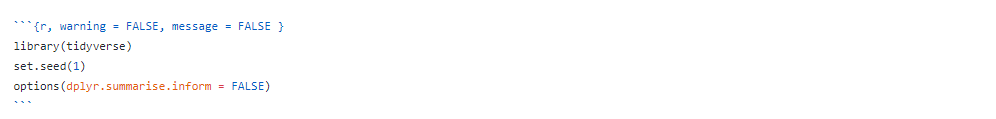

# Introduction

This analysis is an application of what we've learned in Dataquest's Conditional Probability course. Using a dataset of pre-labeled SMS messages, we'll create a spam filter using the Naive Bayes algorithm.

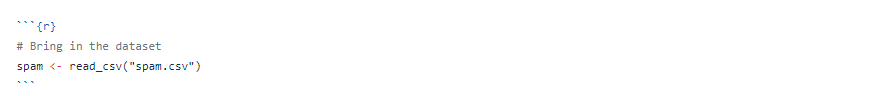

The `spam` dataset has `r nrow(spam)` rows and `r ncol(spam)` columns. Of these messages, `r mean(spam$label == "ham") * 100`% of them are not classified as spam, the rest are spam.

We read in the dataset and saw that about 87% of the messages are ham ("ham" means non-spam), and the remaining 13% are spam. Now that we've become more familiar with the dataset, we can move on to building the spam filter.

Our project is a machine learning problem, specifically a classification problem. The goal of our project is to **maximize** the predictive ability of our algorithm. This is in contrast to what we would usually do in something like hypothesis testing, where the goal is proper statistical inference.

We want to optimize our algorithm's ability to correctly classify messages that it hasn't seen before. We'll want to create a process by which we can tweak aspects of our algorithm to see what produces the best predictions. The first step we need to take towards this process is divide up our `spam` data into 3 distinct datasets.

* A **training set**, which we'll use to "train" the computer how to classify messages.
* A **cross-validation set**, which we'll use to assess how different choices of **alpha** affect the prediction accuracy
*  test set, which we'll use to test how good the spam filter is with classifying new messages.

We're going to keep 80% of our dataset for training, 10% for cross-validation and 10% for testing. We typically want to keep as much data as possible for training. The dataset has 3,184 messages, which means that:

* The training set will have 2,547 messages
* The cross-validation and test sets will have 318 and 319 messages respectively

We expose the algorithm to examples of spam and ham through the training set. In other words, we develop all of the conditional probabilities and vocabulary from the training set. After this, we need to choose an **α** value. The cross-validation set will help us choose the best one. Throughout this whole process, we have a set of data that the algorithm never sees: the test set. We hope to maximize the prediction accuracy in the cross-validation set since it is a proxy for how well it will perform in the test set.

Let's create our training, cross-validation and a test sets. We need to confirm that the cross-validation and test sets have at least some spam messages present in it, otherwise there's no spam to detect!

# Training, Cross-validation and Test Sets

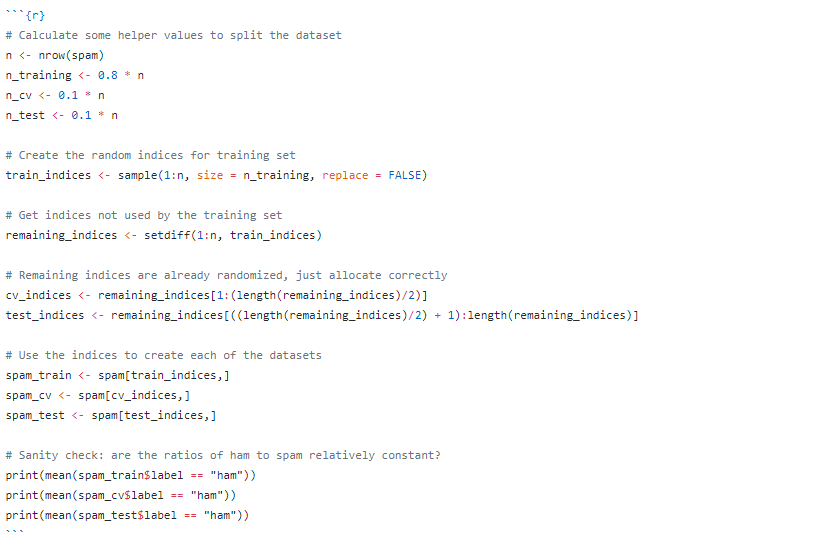

The number of ham messages in each dataset is relatively close to each other in each dataset. This is just to make sure that no dataset is entirely just "ham", which ruins the point of spam detection.

Our next big step is to use the training set to teach the algorithm to classify new messages. Recall that the Naive Bayes algorithm will classify new messages as spam or non-spam based on the results it gets from the following two equations. Note that we have replaced $Spam^C$ with Ham for consistency with our dataset's labels.

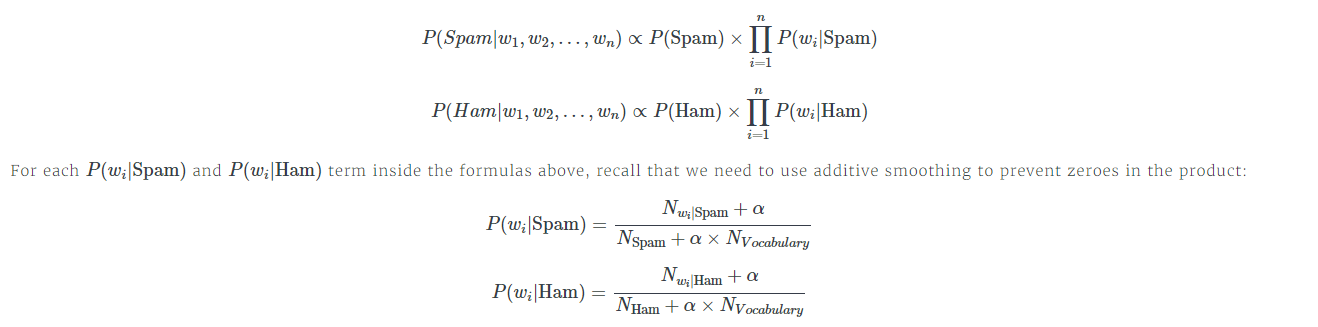

If we further breakdown the notation, we have:

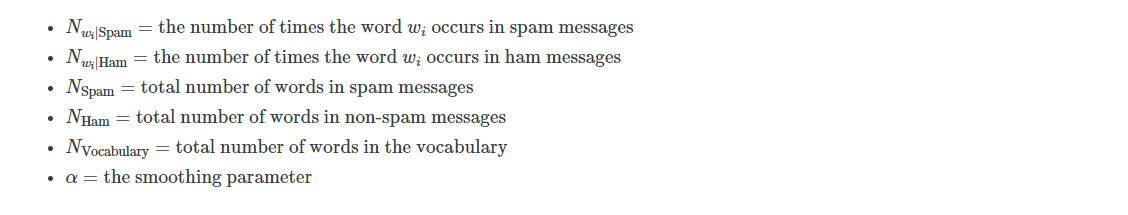

To calculate all these probabilities, we'll first need to clean the data and convert it into a format that makes it easier to get the information we need. Right now, our training and test sets have a similar format to the following:

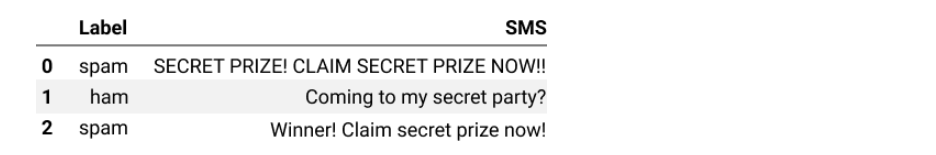

To make the calculations easier, we want to convert this message information into a numerical form. We'll tackle this later, but for now, we should handle the formatting of the messages. Let's begin this data cleaning process by removing the punctuation and bringing all the words to lower case.

# Data Cleaning

1. For each message, convert every letter in the messages to lower case.
    * The `str_to_lower()` function might be useful here as well.
2. Use the `str_squish()` function to reduce unnecessary white space in the messages.
3. Remove all the punctuation from the SMS column.
    * The `str_replace()` and `str_replace_all()` functions might be a good place to start this process.
    * R has prebuilt classes of characters that can be used in regular expression. Looking into the `[:punct:]` and `[:digit:]` classes might be useful.
    * Make sure to examine the vocabulary too! If we find some things in there that don't look right, do some extra cleaning to get rid of it.
4. There are special Unicode characters that also need to be removed from the strings.
    * We should remove "u\0094", "u\0092", "u\0096" in particular
    * We should also remove the line breaks "\n" and "\t"

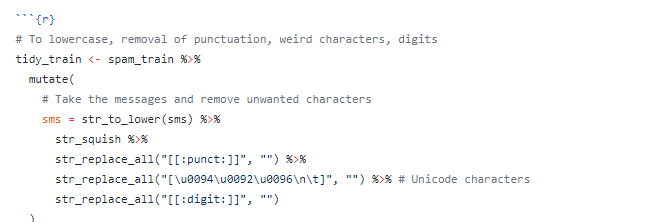

We removed the punctuation and changed all letters to lowercase. The next step we have to take is to create the vocabulary from the training set. Now that the messages in the training set have been cleaned, let's create a list with all of the unique words that occur in it.

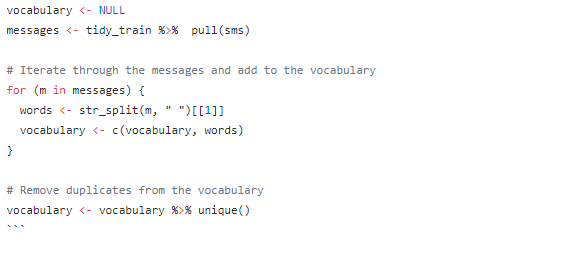

Now that we're done with data cleaning and the vocabulary, we can start calculating the probabilities needed to start classification. Recall that the Naive Bayes algorithm needs to know the probability values of the two equations below to be able to classify new messages:

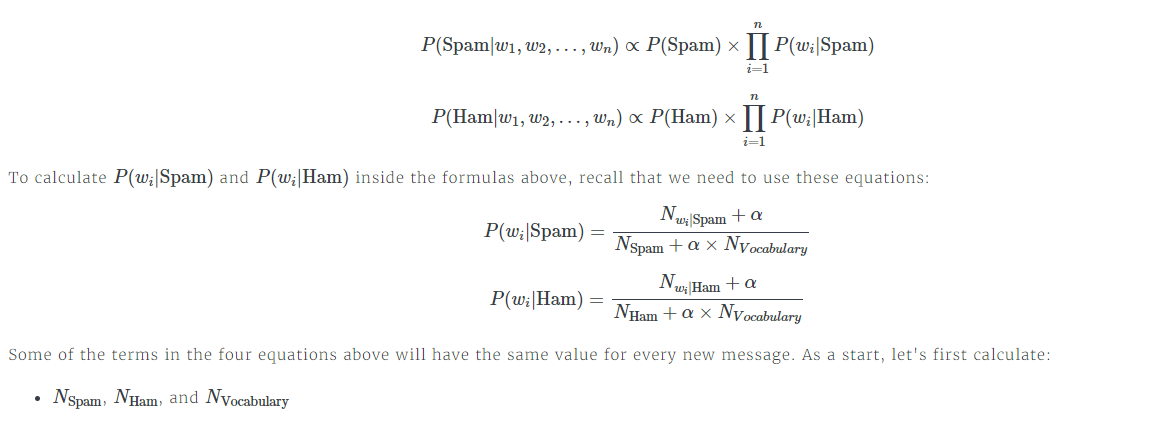

For now, we'll also use smoothing parameter of **α=1**. We don't know right now if this particular value for **α** maximizes the prediction accuracy, so we'll need to come back to this later. But for now, using the training set only:

# Calculating Constants and Parameters

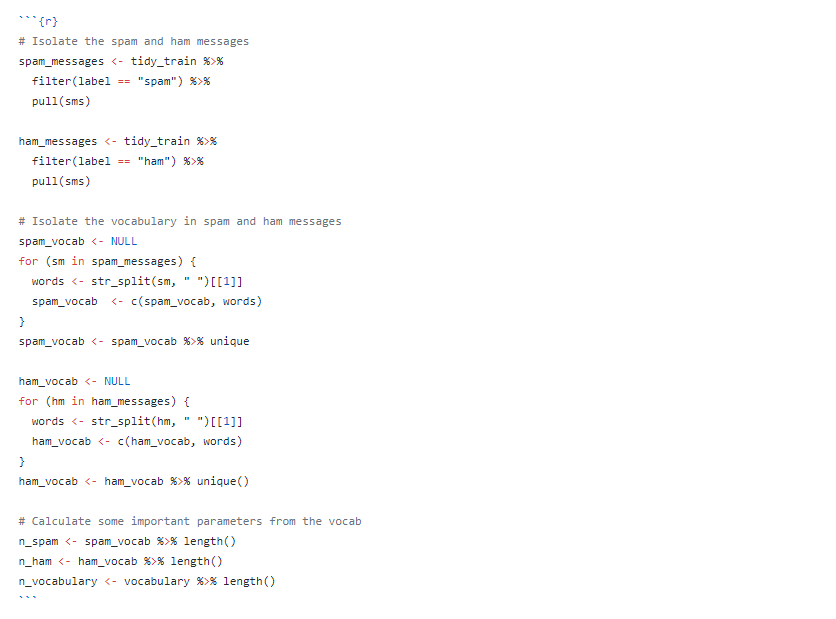

Now we'll be able to calculate two important probabilities:

* **P
(
Spam
)
 and 
P
(
Ham
)**

which represent the marginal probabilities of a message being spam or ham in the training set.

Each of these terms are constants in our equations for every new message. This is why it's useful to calculate them beforehand.

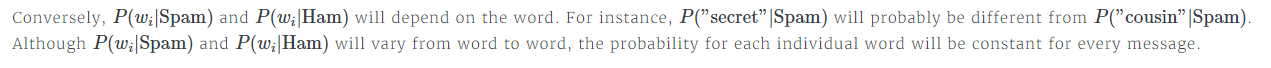

To demonstrate this, let's say we receive two new messages:

* "secret code"
* "secret party 2night"

Both messages contain the word "secret", so we'll need to calculate 
**P
(
"secret"
|
Spam
)**
 for both these messages. We'll look at the training set to get the values we need to find a result for the equation below:
 
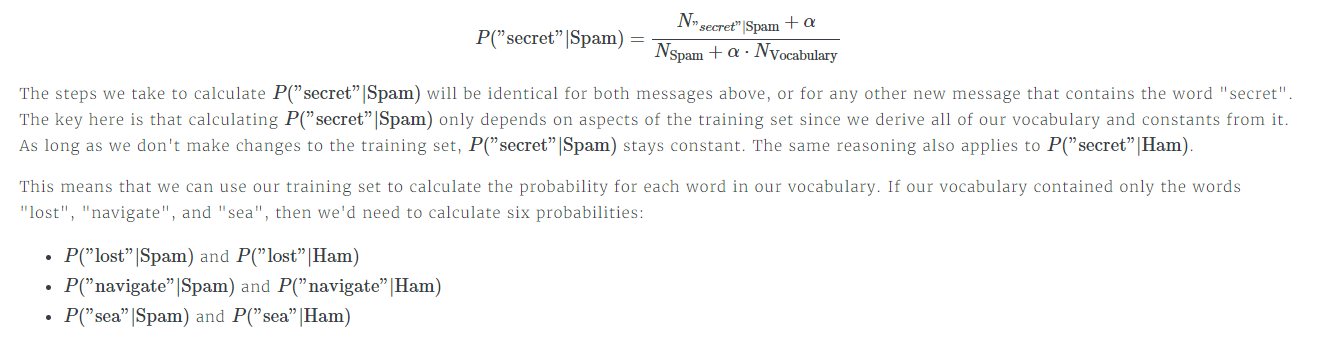

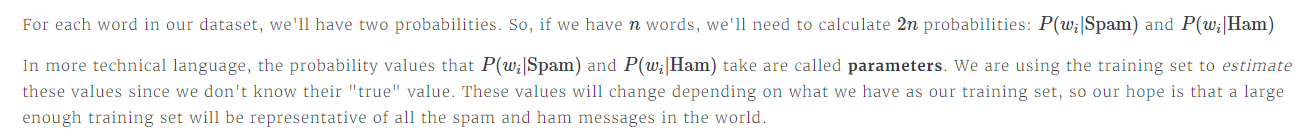

The calculation of all these constants and probabilities before we even start classifying new messages makes the Naive Bayes algorithm very fast (in terms of the amount of computation needed). When a new message comes in, most of the needed computations are already done, so the algorithm merely needs to do some multiplication to classify the new message.

Before we can calculate each of these probabilities, we need to calculate each of the conditional word counts. These counts won't change since we're referencing the same training set, but later in the project, we'll change the value of **α** to see which one works best.

# Calculating Probability Parameters

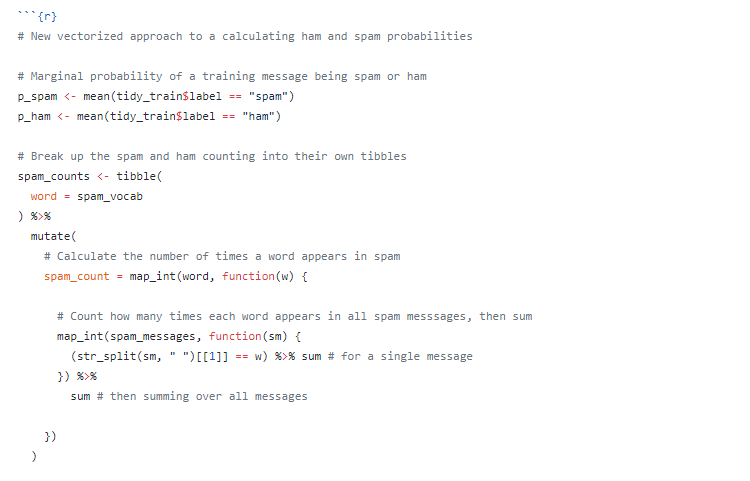

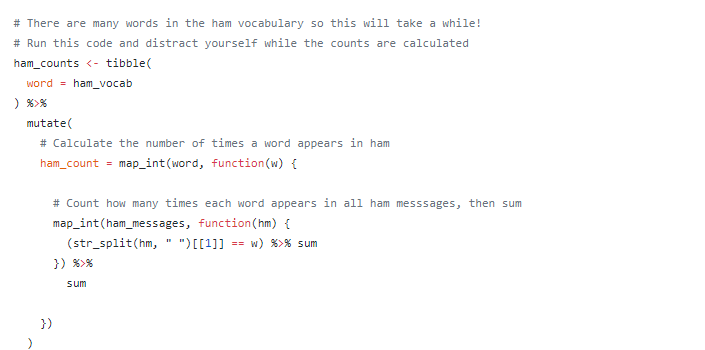

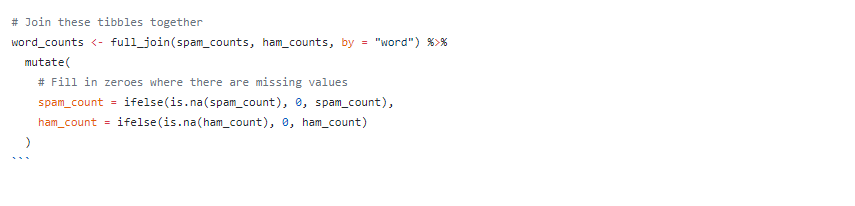

Now that we've have all the constants and word counts we need, we can finally create the probabilities needed to run the spam filter! We want something that takes in a new message and outputs a classification for the message. This particular format means that a function would probably be the best approach. Once we have the function, we can `map()` it over the cross-validation and test sets to see how it actually performs.

Let's now calculate all the parameters using the equations below:

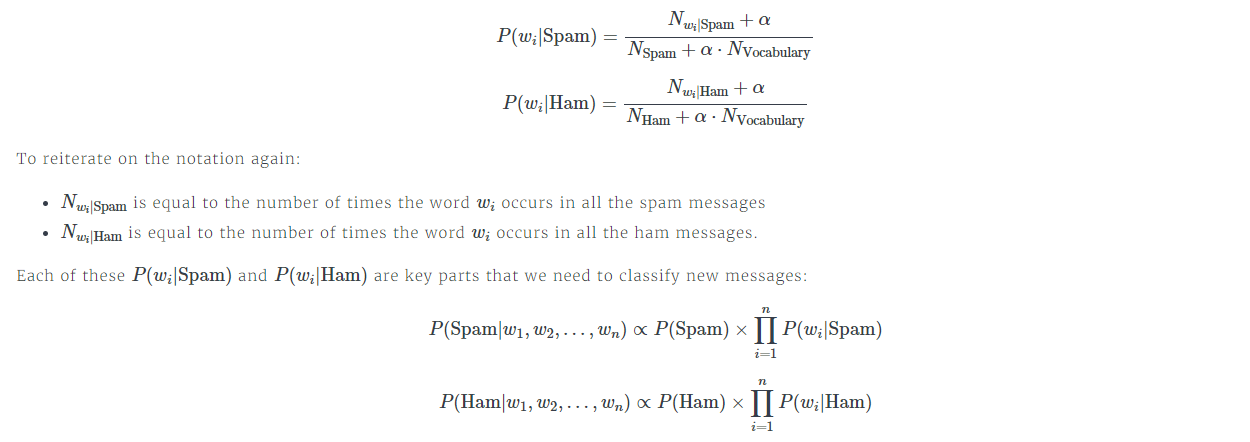

There are many ways to approach this, but we'll recommend using the word counts to hold all of the conditional probabilities for each $w_i$ for both the spam and ham words. We like this approach for its convenience. At the end of all the calculation, we should be able to reference each word in the vocabulary for a probability.

Thinking in terms of the programming specifics, we want the function to:

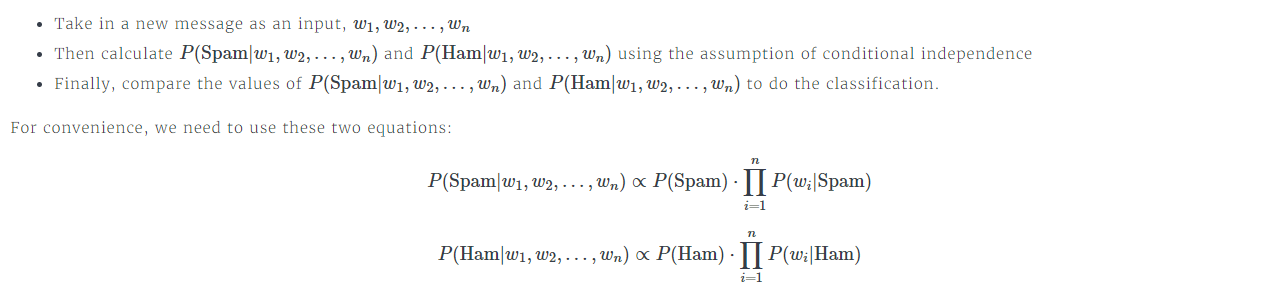

Note that some new messages will contain words that are not part of the vocabulary. We simply ignore these words when we're calculating the probabilities. We'll need to take this into account when we're writing our classification function.

# Classifying New Messages

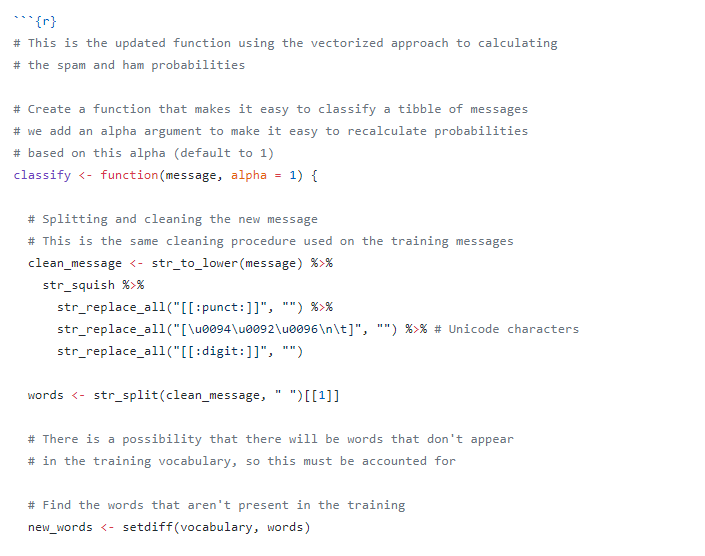

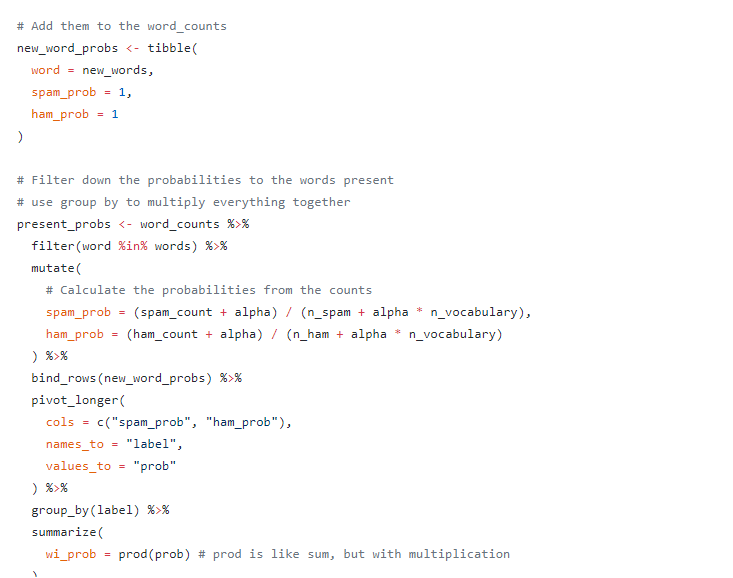

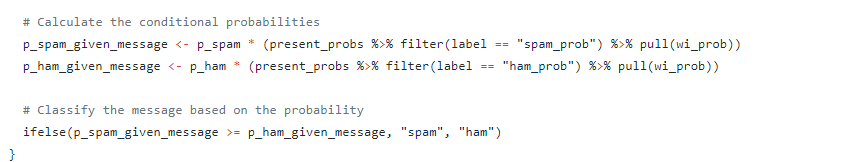

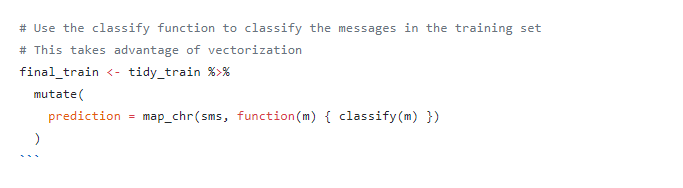

Now we have the predicted values, we can compare them with the actual values to measure how well our spam filter classifies messages. To make the measurement, we'll use **accuracy** as a metric:

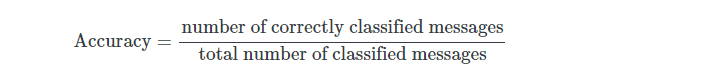

One good way of quickly tabulating the results of the classifier is to convert it into a confusion matrix. A confusion matrix shows how the predictions matches up against the actual labels. The `table()` function could be useful here.

# Calculating Accuracy

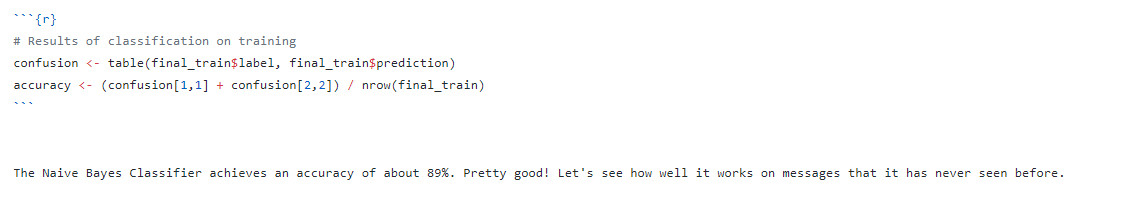

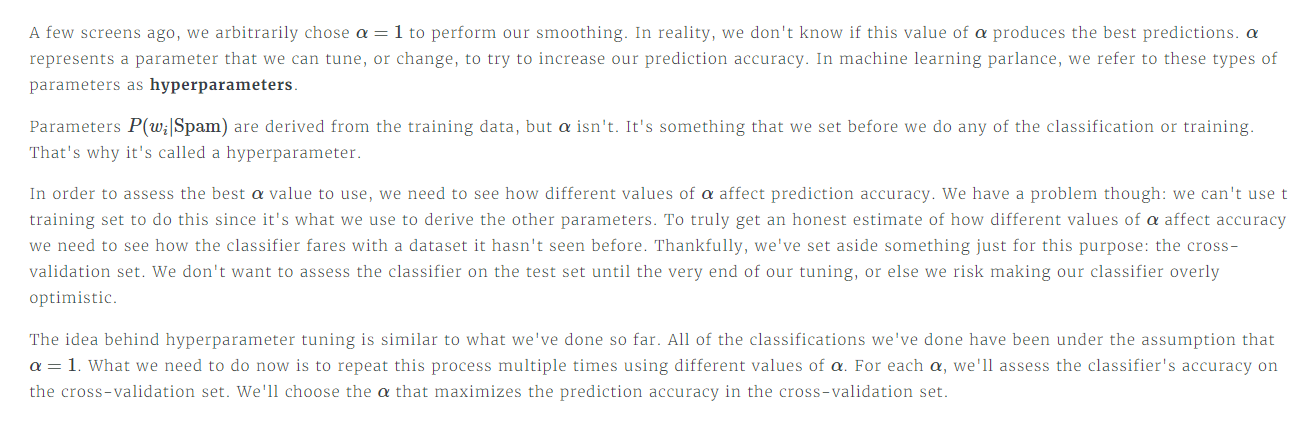

For our hyperparameter tuning, we'll look at a range of **α** from 0.1 to 1. We may choose different values for our own analysis

# Hyperparameter Tuning

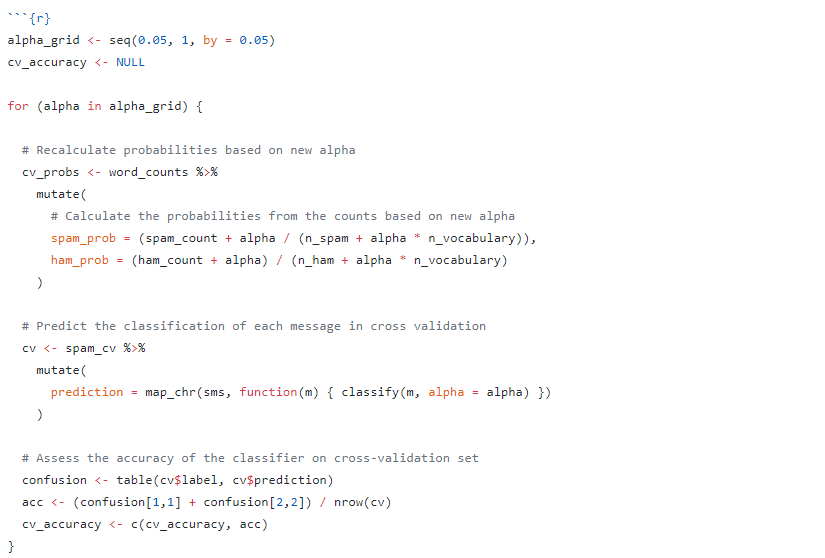

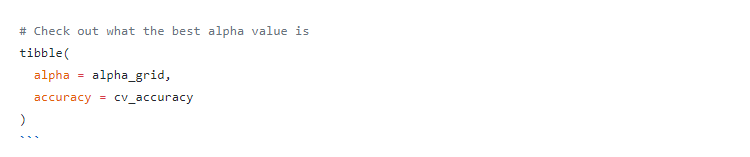

Judging from the cross-validation set, higher $\alpha$ values cause the accuracy to decrease. We'll go with $\alpha = 0.1$ since it produces the highest cross-validation prediction accuracy.

We took some extra care to figure out an optimal value for the smoothing parameter. After all of our hard work, it's finally time to see how well the classifier fares with the test set.

# Test Set Performance

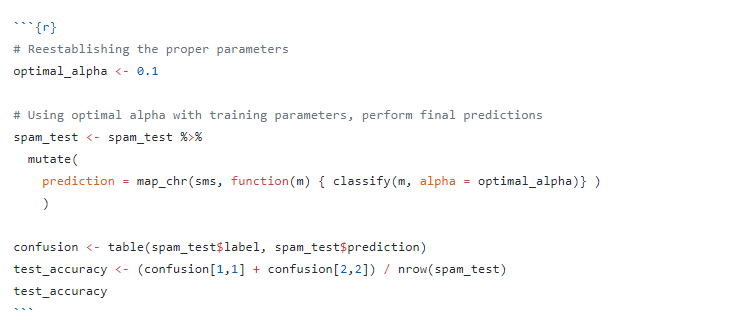

We've achieved an accuracy of 93% in the test set. Not bad!

In this project, we built a spam filter for SMS messages using the multinomial Naive Bayes algorithm. Along the way we applied the concepts from conditional probability into a functional project. We also applied some machine learning concepts to really maximize the predictive ability of our classifier, in the form of cross-validation and training-test splitting.

There are several improvements that we can make on the project, here's just a few suggestions:

* Some words in the vocabulary really don't make any sense. See what happens when we more finely control the resulting vocabulary from the training set.
* Examine some of the misclassified messages and try to look for some patterns in why they might have been classified incorrectly
* Try creating multiple classifiers and implementing a majority vote system for classification.